In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [5]:
# from sympy import *
# x, y = symbols('x y', real=False)
# w=diff( x**2 + y**2, y,evaluate=True)
# print(diff( x**2 + y**2, y))
#3*y**2
#diff( x**2 + y**3, y).subs({x:3, y:1})

In [6]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=108
    sol=integrate.solve_ivp(hamilton,(0,18),(pinit_val,qinit_val),t_eval=np.linspace(0,18,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    return p,q


In [7]:
x,y=Data(1,1)
coord_list=np.array([])
for i in range (len(x)):
    a=(x[i],y[i])
    coord_list=np.append(coord_list,a)
   
last_coord_list = np.reshape(coord_list,(len(x),2))
np.random.shuffle(last_coord_list)

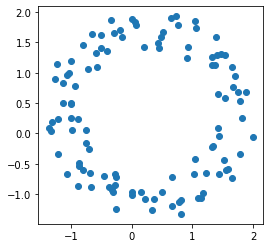

In [8]:
plt.plot(x,y,'o')
plt.axis('scaled');

In [9]:
train_coord,test_coord=np.split(last_coord_list,[86])
#print(len(train_coord))
#len(test_coord)

In [8]:
#def loss():
    
    

In [ ]:
def HNN():

In [10]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(1, activation="softmax"))

In [11]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 41,001
Trainable params: 41,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
#tf.keras.losses.mean_absolute_error
myModel.compile(loss="mean_absolute_error",
                optimizer="Adam",
                metrics=["accuracy"])

In [14]:
y_train=np.array([])
for i in range (len(train_coord)):
    y_train=np.append(y_train,(train_coord[i][0]**2+train_coord[i][1]**2))

In [15]:
trainedModel=myModel.fit(train_coord, y_train, epochs=30)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 0s 890us/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 0s 838us/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 0s 1ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.0000e+00
Epoch 10/30
3/3 [==============================] - 0s 3ms/step - loss: 1.2572 - accuracy: 0.0000

<AxesSubplot:>

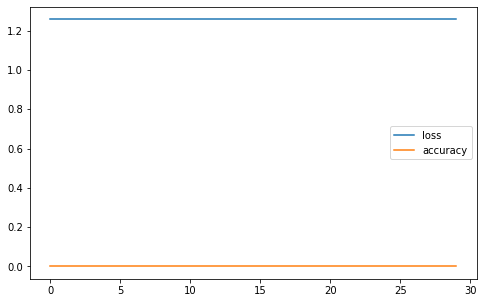

In [16]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [19]:
y_test=np.array([])
for i in range (len(test_coord)):
    y_test=np.append(y_test,(test_coord[i][0]**2+test_coord[i][1]**2))

In [20]:
myModel.evaluate(test_coord, y_test)

1/1 [==============================] - 0s 873us/step - loss: 1.4089 - accuracy: 0.0000e+00


[1.4089382886886597, 0.0]

In [18]:
a=np.array([])
a=np.append(a,[1,2,3])

In [19]:
a

array([1., 2., 3.])